### This notebook is to transform the raw rating data into standardized scores for each recording

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import zscore, iqr
from statistics import mean, stdev


import seaborn as sns

In [39]:
ratings_df = pd.read_csv("C:\\Users\\baile\\OneDrive\\Desktop\\Classes\\Fall2020Classes\\Thesis\\Please_Dont_Sing\\collect_and_clean\\current_ratings.csv")

In [40]:
### We will calculate the mean and the standard deviation of the ratings for each volunteer

In [41]:
ratings_standard_dev = ratings_df.groupby("name").std()
ratings_mean = ratings_df.groupby("name").mean()

In [42]:
ratings_standard_dev.head()

,rating
name,
Abigail Haworth,1.643168
Alicia Ver Voort,1.341641
Alvin Theckedath,2.073644
Anthony Martin,1.816590
Azniv Khaligian,2.375647


In [45]:
ratings_mean.head()

,rating
name,
Abigail Haworth,6.200000
Alicia Ver Voort,6.400000
Alvin Theckedath,3.400000
Anthony Martin,5.400000
Azniv Khaligian,4.342857


I wonder if the average of the above is a 5? It would be if everyone rated on a fair / even scale...

In [46]:
ratings_mean['rating'].mean()

5.772736892736891

It is actually closer than I expected! Nonetheless, we will calculate the z scores to normalize by the variability between people

### Next, we create: 
* a list that holds the difference of each rating from the mean of the rater
* a list that holds the z score of each rating (or the difference from the mean / standard deviation) 

In [47]:
ratings_differences = [(ratings_df.iloc[i, 2] - ratings_mean.loc[ratings_df.iloc[i, 0], 'rating']) for i in range(len(ratings_df))]
ratings_normalized = [(ratings_differences[i] / ratings_standard_dev.loc[ratings_df.iloc[i, 0], 'rating']) for i in range(len(ratings_df))]

In [48]:
ratings_normalized

[0.1094140829227507,
 -1.0628796626781505,
 -0.4767327898776999,
 -0.4767327898776999,
 1.2817078285236518,
 -1.5825131361498892,
 0.395628284037472,
 -0.26375218935831507,
 1.055008757433259,
 0.395628284037472,
 -0.9760066581554423,
 0.5384864320857611,
 0.033655402005359956,
 -0.4711756280750412,
 -1.4808376882358434,
 1.5481484922465634,
 2.0529795223269645,
 -0.4711756280750412,
 -0.9760066581554423,
 1.0433174621661623,
 -0.8323163659625112,
 1.7960511054980501,
 0.04380612452434253,
 0.04380612452434253,
 0.4818673697677694,
 -1.708438856449365,
 0.4818673697677694,
 -0.8323163659625112,
 -0.39425512071908436,
 0.9199286150111963,
 0.033655402005359956,
 -0.4711756280750412,
 0.033655402005359956,
 -0.9760066581554423,
 0.5384864320857611,
 1.0458607465600853,
 0.43064854270121167,
 0.43064854270121167,
 -2.030200272734283,
 -1.4149880688754093,
 -0.18456366115766198,
 -2.030200272734283,
 0.43064854270121167,
 -0.18456366115766198,
 -0.18456366115766198,
 -0.18456366115766198,


Text(0, 0.5, 'Z Score')

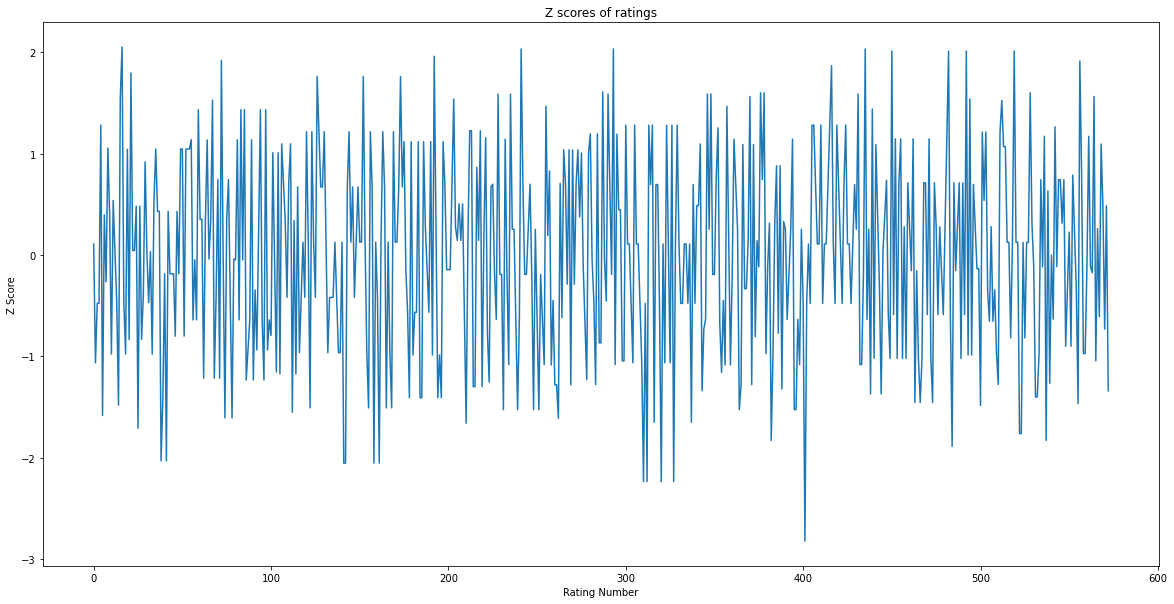

In [49]:
plt.figure(figsize = (20,10))
plt.plot(ratings_normalized)
plt.title("Z scores of ratings")
plt.xlabel("Rating Number")
plt.ylabel("Z Score")

Text(0, 0.5, 'frequency')

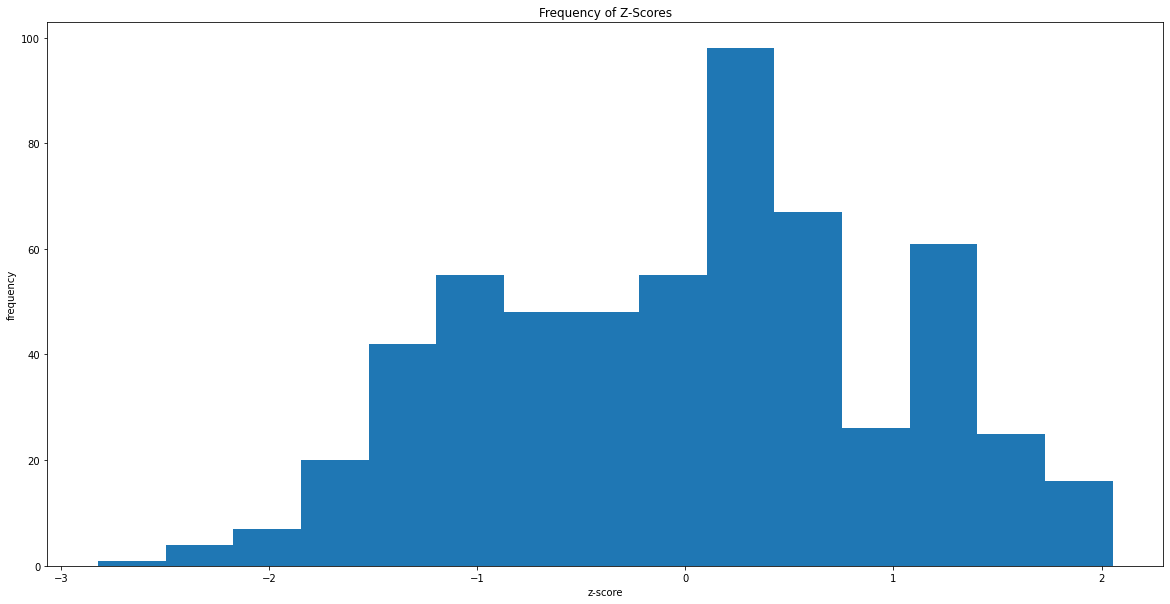

In [50]:
plt.figure(figsize = (20,10))
plt.hist(ratings_normalized, bins = 'auto')
plt.title("Frequency of Z-Scores")
plt.xlabel("z-score")
plt.ylabel("frequency")


We can see visually that these z scores are all centered around 0, which is a good sign!

In [51]:
#add the z scores to the original dataframe
ratings_df['z_score'] = ratings_normalized

In [52]:
#finally, take the average of the z scores of each recording to get a final value for those recordings
ratings_zscores = ratings_df.groupby('rating_id').mean()

In [53]:
ratings_zscores.head()

,rating,z_score
rating_id,,
recording0.mp3,9.50,1.562767
recording1.mp3,9.25,1.182873
recording10.mp3,4.25,-0.965464
recording11.mp3,7.50,0.707929
recording12.mp3,6.75,0.811068


If we decide that we want to use ML to predict a categorical variable instead of a continuous (like we have with z scores), we can use the pd.cut() function.  

When we run that below, we see that it segments the three categories to be (-1.689 to -0.58), (-0.58 to 0.524), and (0.524 to 1.629). This seems reasonable - the first group would be recordings that had consistently bad reviews. The second is "average" recordings, and the third group has recordings that had better than average reviews.  

If we go this route, we know that all three groups will have the same amount of reviews in them. 

In [54]:
pd.cut(ratings_zscores['z_score'], 3)

rating_id
recording0.mp3        (0.51, 1.63]
recording1.mp3        (0.51, 1.63]
recording10.mp3    (-1.734, -0.61]
recording11.mp3       (0.51, 1.63]
recording12.mp3       (0.51, 1.63]
                        ...       
recording84.mp3       (0.51, 1.63]
recording85.mp3    (-1.734, -0.61]
recording86.mp3      (-0.61, 0.51]
recording87.mp3    (-1.734, -0.61]
recording9.mp3     (-1.734, -0.61]
Name: z_score, Length: 88, dtype: category
Categories (3, interval[float64]): [(-1.734, -0.61] < (-0.61, 0.51] < (0.51, 1.63]]

In [55]:
def assign_category(df):
    if df['z_score'] <= -0.61:
        ret_val = "bad"
    elif df['z_score'] <= 0.51:
        ret_val = "okay"
    else:
        ret_val = "good"

    return ret_val

ratings_zscores['category'] = ratings_zscores.apply(assign_category, axis = 1)

We will also make a column for a binary category

In [56]:
pd.cut(ratings_zscores['z_score'], 2)

rating_id
recording0.mp3       (-0.0503, 1.63]
recording1.mp3       (-0.0503, 1.63]
recording10.mp3    (-1.734, -0.0503]
recording11.mp3      (-0.0503, 1.63]
recording12.mp3      (-0.0503, 1.63]
                         ...        
recording84.mp3      (-0.0503, 1.63]
recording85.mp3    (-1.734, -0.0503]
recording86.mp3      (-0.0503, 1.63]
recording87.mp3    (-1.734, -0.0503]
recording9.mp3     (-1.734, -0.0503]
Name: z_score, Length: 88, dtype: category
Categories (2, interval[float64]): [(-1.734, -0.0503] < (-0.0503, 1.63]]

In [57]:
def assign_binary_category(df):
    if df['z_score'] <= -0.0503:
        ret_val = "bad"
    else:
        ret_val = "good"

    return ret_val


ratings_zscores['binary_category'] = ratings_zscores.apply(assign_binary_category, axis = 1)

In [59]:
ratings_zscores[ratings_zscores['category'] == 'good']

,rating,z_score,category,binary_category
rating_id,,,,
recording0.mp3,9.500000,1.562767,good,good
recording1.mp3,9.250000,1.182873,good,good
recording11.mp3,7.500000,0.707929,good,good
recording12.mp3,6.750000,0.811068,good,good
recording21.mp3,6.777778,0.545591,good,good
recording23.mp3,6.500000,0.562709,good,good
recording28.mp3,7.000000,0.952026,good,good
recording3.mp3,9.000000,1.450749,good,good
recording30.mp3,7.500000,0.837206,good,good


In [60]:
#below, I am just finding the recordings that haven't been selected often by the randomizer - I am going to change the randomizer to only choose from these for a day or two

rating_counts = ratings_df.groupby('rating_id').count()
rating_counts[rating_counts['name'] < 3].index

Index([], dtype='object', name='rating_id')

In [61]:
#output the data 

ratings_zscores.to_csv("C:\\Users\\baile\\OneDrive\\Desktop\\Classes\\Fall2020Classes\\Thesis\\Please_Dont_Sing\\collect_and_clean\\normalized_ratings.csv")

## Next, we will look into whether there are outliers in the dataset

In [30]:
audio_frequencies_1000 = pd.read_csv("C:\\Users\\baile\\OneDrive\\Desktop\\Classes\\Fall2020Classes\\Thesis\\Please_Dont_Sing\\collect_and_clean\\complete_audio_freqs.csv")

In [31]:
df_zscore = audio_frequencies_1000.apply(zscore)

the above allowed us to see the z scores of each frequency, which can help us determine if there are outliers


In [68]:
print(audio_frequencies_1000.iloc[:, 0])

0      89.24
1      94.61
2     167.31
3      86.30
4     206.78
       ...  
83    292.44
84    114.14
85    150.32
86    263.11
87     45.33
Name: frequency0, Length: 88, dtype: float64


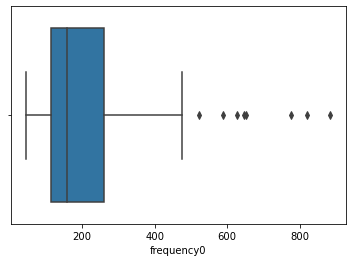

In [69]:
sns.boxplot(audio_frequencies_1000.iloc[:, 0])

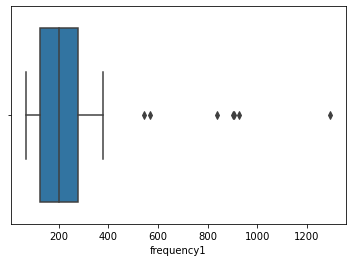

In [72]:
sns.boxplot(audio_frequencies_1000.iloc[:, 1])

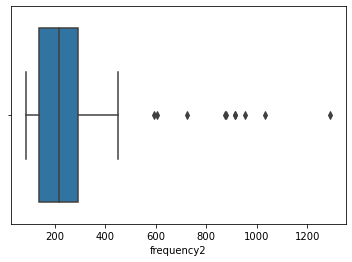

In [73]:
sns.boxplot(audio_frequencies_1000.iloc[:, 2])

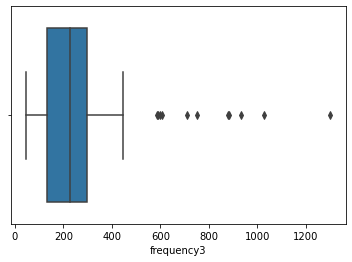

In [75]:
sns.boxplot(audio_frequencies_1000.iloc[:, 3])